In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck
from scipy.constants import elementary_charge
import seaborn as sns
h = Planck
e = elementary_charge


In [22]:
file_path = 'A0044CH2.csv'
data = pd.read_csv(file_path, skiprows=15)
data = data.drop(data.columns[1], axis=1)
data

Waveform Data
0                -1
1                -1
2                 3
3                 4
4                 8
...             ...
3995              4
3996              3
3997              2
3998              1
3999              0

[4000 rows x 1 columns]

In [26]:
# file_path = 'current.csv'
# data = pd.read_csv(file_path)
R_f = 1e5

In [27]:
data = data*1e-2
data

Waveform Data
0             -0.01
1             -0.01
2              0.03
3              0.04
4              0.08
...             ...
3995           0.04
3996           0.03
3997           0.02
3998           0.01
3999           0.00

[4000 rows x 1 columns]

In [28]:
n = data.size
n

4000

In [29]:
initial = 0
final = n
time = np.arange(0,n)
time = time*1e-5
time = time[initial:final]
time

array([0.000e+00, 1.000e-05, 2.000e-05, ..., 3.997e-02, 3.998e-02,
       3.999e-02])

In [30]:
data_new = data[initial:final]
data_new = data_new/R_f
data_new

Waveform Data
0     -1.000000e-07
1     -1.000000e-07
2      3.000000e-07
3      4.000000e-07
4      8.000000e-07
...             ...
3995   4.000000e-07
3996   3.000000e-07
3997   2.000000e-07
3998   1.000000e-07
3999   0.000000e+00

[4000 rows x 1 columns]

In [31]:
current = data_new

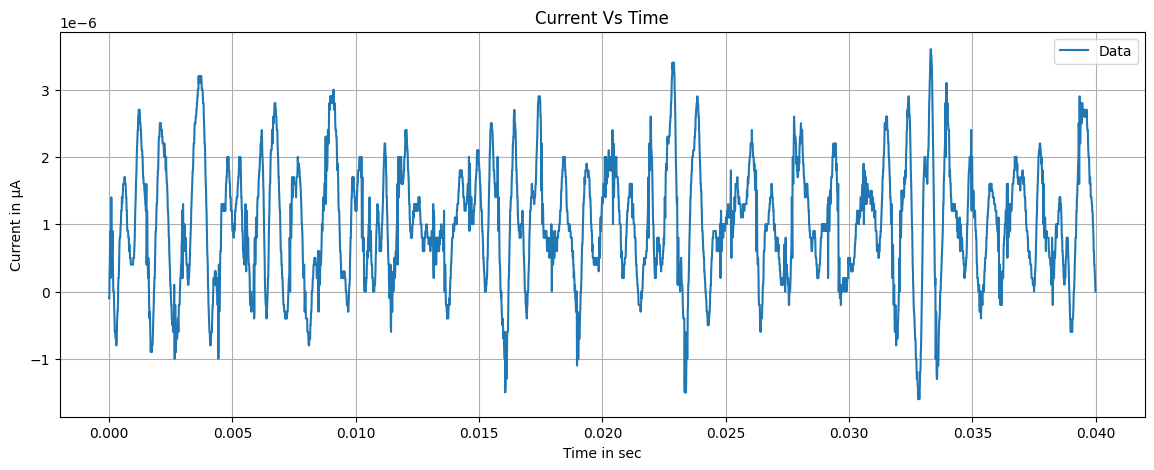

In [32]:
plt.figure(figsize=(14,5))
plt.plot(time, current, marker='', label='Data')
plt.title('Current Vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Current in \u00B5A')
plt.legend()
plt.grid(True)
plt.savefig('Current graph.png')
plt.show()


In [33]:
ste = e*e/h
ste = ste*2
ste

7.748091729863649e-05

In [34]:
v = 0.0133
conductance = current/v
steps = ste
conductance = conductance/steps

In [35]:
#conductance shift
# r = 2
# conductance = (conductance-0.6)

In [36]:
# sorted_array = np.sort(conductance)

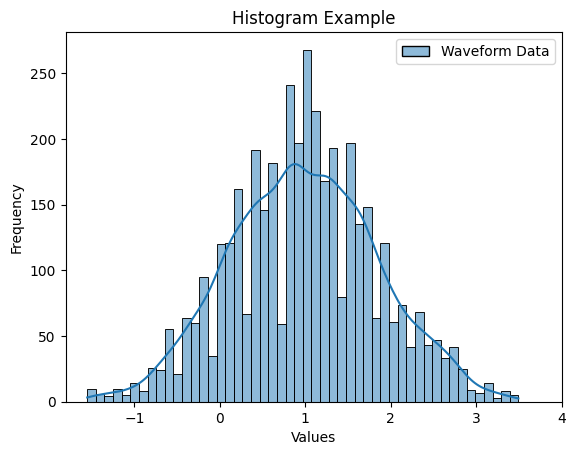

In [37]:
sns.histplot(conductance, bins=50, kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Customize x-axis ticks and labels
xticks = np.arange(-1, 5, 1)  # Adjust the range and step based on your data
plt.xticks(xticks)

# Show the plot
plt.show()







Text(0.5, 1.0, 'Counts vs Frequencies KDE Curve')

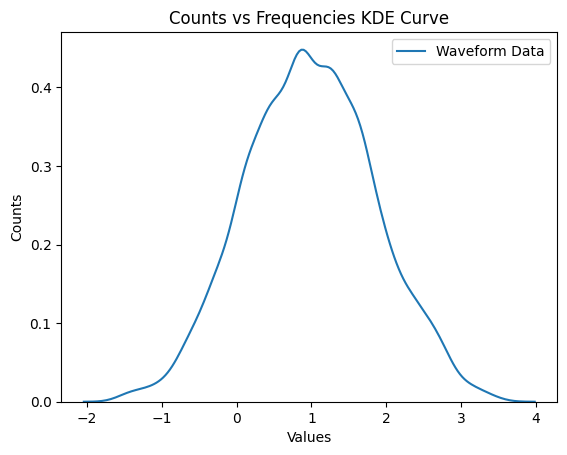

In [38]:
sns.kdeplot(conductance, color='blue', common_norm=False)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Counts vs Frequencies KDE Curve')

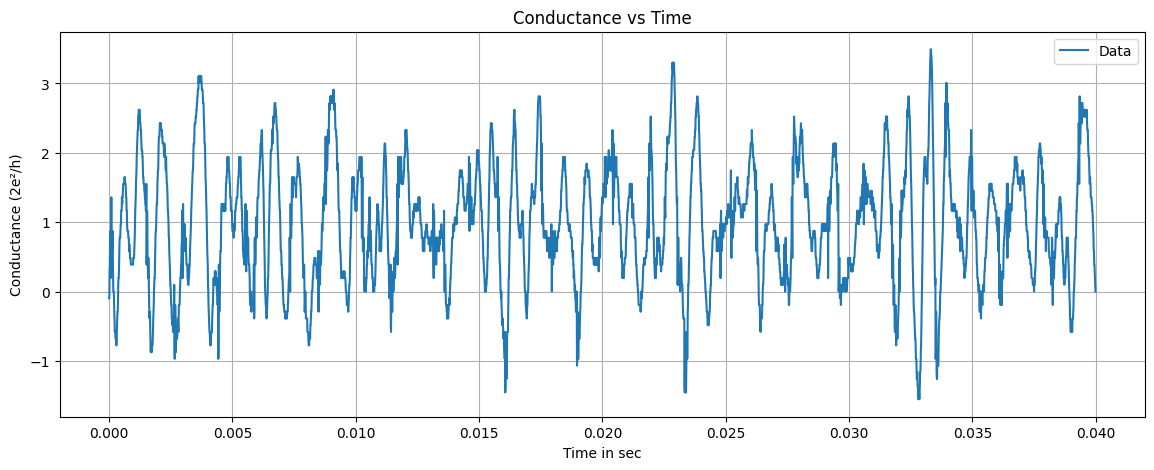

In [39]:
plt.figure(figsize=(14,5))
plt.plot(time, conductance, marker='', label='Data')
plt.title('Conductance vs Time')
plt.xlabel('Time in sec')
plt.ylabel('Conductance (2e\u00b2/h)')
plt.legend()
plt.grid(True)
plt.savefig('conductance_graph.png')
plt.show()


In [40]:
fft_result = np.fft.fft(data_new)
frequencies = np.fft.fftfreq(len(data_new))

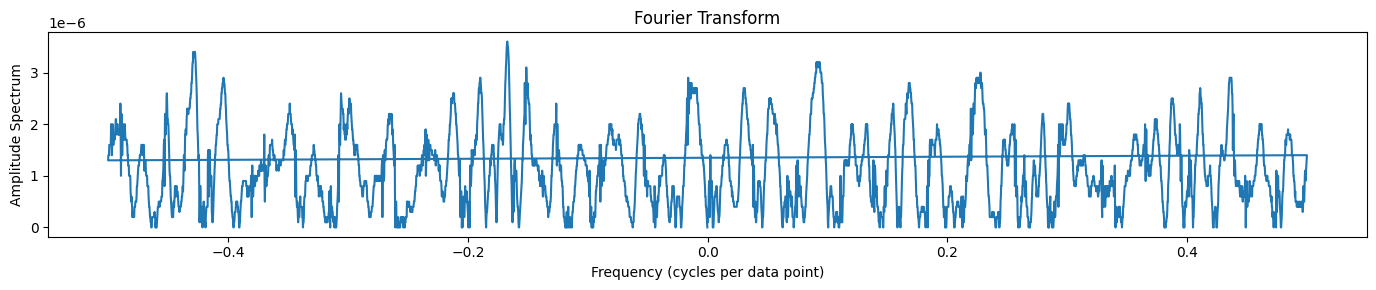

In [41]:
plt.figure(figsize=(14, 3))

plt.plot(frequencies, np.abs(fft_result), marker='')
plt.title('Fourier Transform')
plt.xlabel('Frequency (cycles per data point)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.savefig('Frequency_graph.png')
plt.show()
